**DataSet de Consultas Oncologicas**

Problemas detectados (parcialmente):

Etiquetas inconsistentes en rango_etario como:

"15 - 19 ANIOS" vs "15 - 19 ANOS" vs "15 - 19 ANIO"
"1 - 4 ANIOS" vs "1 - 4 ANOS"
">=70 ANIOS" vs ">=70 ANOS"
"5 - 14 ANIOS" vs "5 - 14 ANOS"

Errores de tipo #¡REF!: se detectaron algunos valores inválidos en el archivo, pero no se pudieron mostrar por completo debido al error.


In [2]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("/content/consultas_odontologicas - Odontologia.csv")

# Convertir todos los valores a texto para evitar errores de tipo
df_str = df.astype(str)

# Detectar filas con errores tipo '#¡REF!'
errores_ref = df_str[df_str.apply(lambda row: row.str.contains("#¡REF!", na=False).any(), axis=1)]

# Extraer valores únicos de 'rango_etario'
rangos_unicos = df_str['rango_etario'].unique()

# Detectar etiquetas inconsistentes en 'rango_etario'
duplicados = [r for r in rangos_unicos if any(x in r for x in ["ANIOS", "ANOS", "ANO"])]

# Mostrar resultados
print("Etiquetas únicas en 'rango_etario':")
print(rangos_unicos)
print("\nEtiquetas inconsistentes detectadas:")
print(duplicados)
print("\nEjemplos de filas con errores '#¡REF!':")
print(errores_ref.head())

Etiquetas únicas en 'rango_etario':
['1 - 4 ANIOS' '5 - 14 ANIOS' '15 - 19 ANIOS' '20-39 ANIOS' '40-69 ANIOS'
 '>=70 ANIOS' '< 1 ANIO' '#¡REF!' 'nan' '5-14 ANIOS' '5 - 14 ANOS'
 '20-39 ANOS' '40-69 ANOS' '15 - 19 ANOS' '1 - 4 ANOS' '>=70 ANOS'
 '< 1 ANO']

Etiquetas inconsistentes detectadas:
['1 - 4 ANIOS', '5 - 14 ANIOS', '15 - 19 ANIOS', '20-39 ANIOS', '40-69 ANIOS', '>=70 ANIOS', '5-14 ANIOS', '5 - 14 ANOS', '20-39 ANOS', '40-69 ANOS', '15 - 19 ANOS', '1 - 4 ANOS', '>=70 ANOS', '< 1 ANO']

Ejemplos de filas con errores '#¡REF!':
                       saps       fecha     servicio   turno  \
2710              ESPERANZA  2020-06-01  ODONTOLOGIA   TARDE   
3040  DR. ALBERTO LIFSCHITZ  2020-07-01  ODONTOLOGIA   TARDE   
3309     DR. ANIBAL MALVIDO  2020-08-01  ODONTOLOGIA  MANANA   
3310     DR. ANIBAL MALVIDO  2020-08-01  ODONTOLOGIA  MANANA   
4949             DR. SEMPER  2020-11-01  ODONTOLOGIA   TARDE   

     consulta_cantidad  rango_etario    sexo                           detal

Procedemos a la limpieza
1. Limpieza automática del dataset:

 - Estandarizar etiquetas de rango_etario.
 - Reemplazar #¡REF! por valores nulos (NaN) o etiquetas válidas si se puede inferir.

In [3]:
import pandas as pd
import numpy as np

# Cargar el archivo original
df = pd.read_csv("/content/consultas_odontologicas - Odontologia.csv")

# Reemplazar errores '#¡REF!' por NaN
df.replace(to_replace=r"#¡REF!", value=np.nan, regex=True, inplace=True)

# Estandarizar etiquetas en 'rango_etario'
etario_map = {
    "1 - 4 ANOS": "1 - 4 AÑOS",
    "1 - 4 ANIOS": "1 - 4 AÑOS",
    "< 1 ANIO": "< 1 AÑO",
    "< 1 ANO": "< 1 AÑO",
    "5 - 14 ANIOS": "5 - 14 AÑOS",
    "5 - 14 ANOS": "5 - 14 AÑOS",
    "5-14 ANIOS": "5 - 14 AÑOS",
    "15 - 19 ANIOS": "15 - 19 AÑOS",
    "15 - 19 ANOS": "15 - 19 AÑOS",
    "20-39 ANIOS": "20 - 39 AÑOS",
    "20-39 ANOS": "20 - 39 AÑOS",
    "40-69 ANIOS": "40 - 69 AÑOS",
    "40-69 ANOS": "40 - 69 AÑOS",
    ">=70 ANIOS": ">= 70 AÑOS",
    ">=70 ANOS": ">= 70 AÑOS"
}
df['rango_etario'] = df['rango_etario'].replace(etario_map)

# Reemplazar valores nulos numéricos por la media
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Reemplazar valores nulos categóricos por la moda
for col in df.select_dtypes(include=["object"]).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Guardar el archivo limpio
df.to_csv("consultas_odontologicas_imputado.csv", index=False)
print("Archivo con imputación de valores generado exitosamente como 'consultas_odontologicas_imputado.csv'.")


Archivo con imputación de valores generado exitosamente como 'consultas_odontologicas_imputado.csv'.


/tmp/ipython-input-2654368025.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-2654368025.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

2. Ahora procederemos a cargar el dataset limpio para empezar con nuestro analisis.

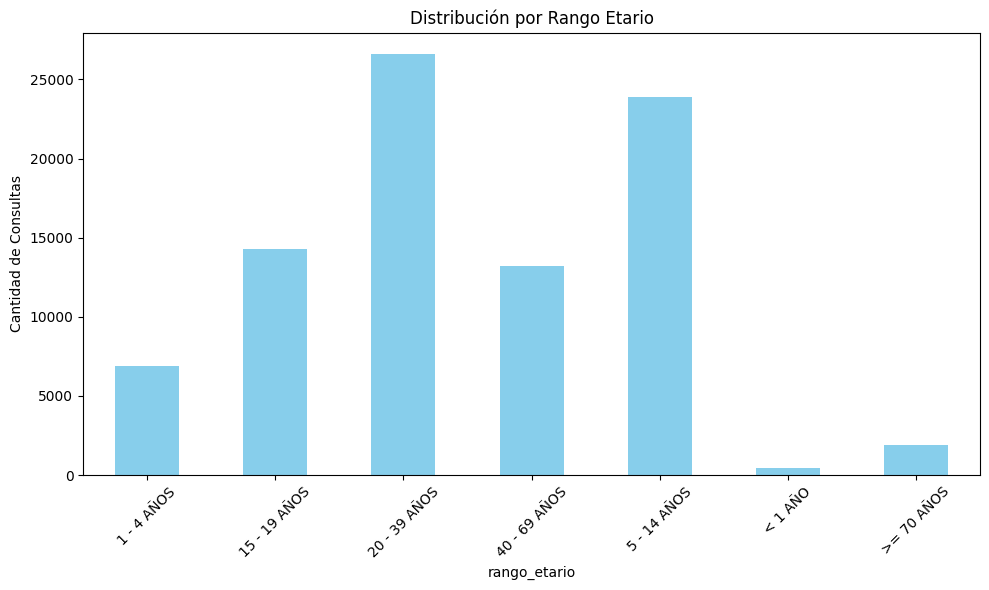

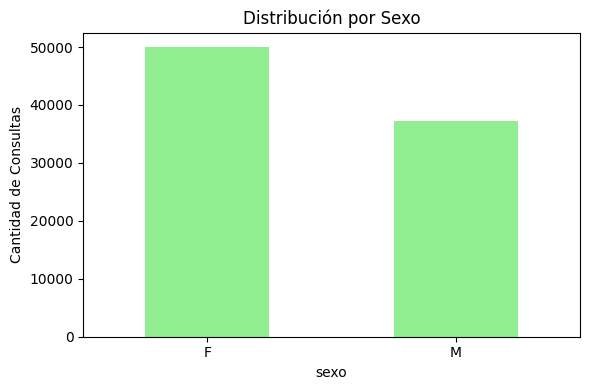

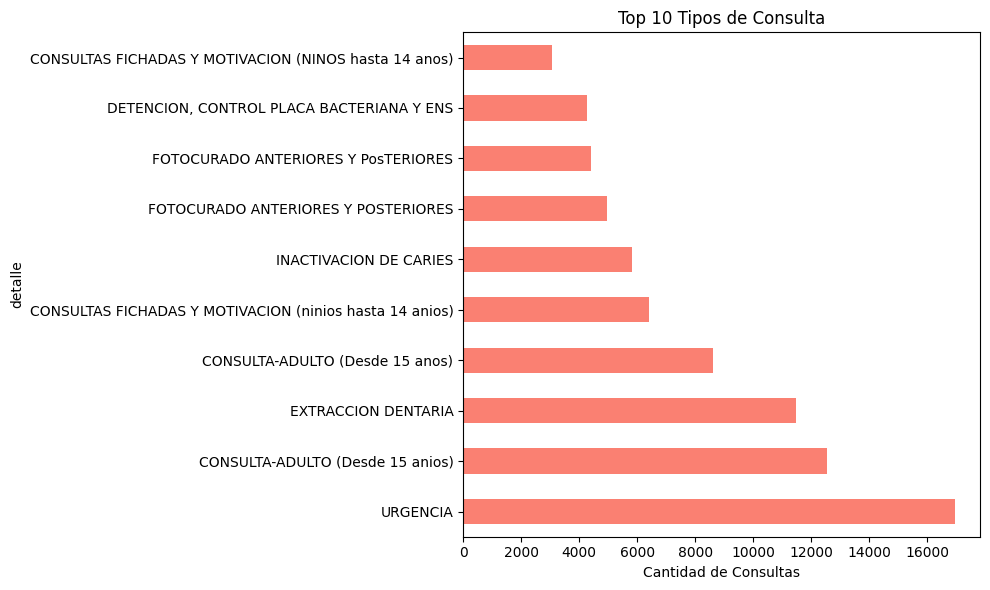

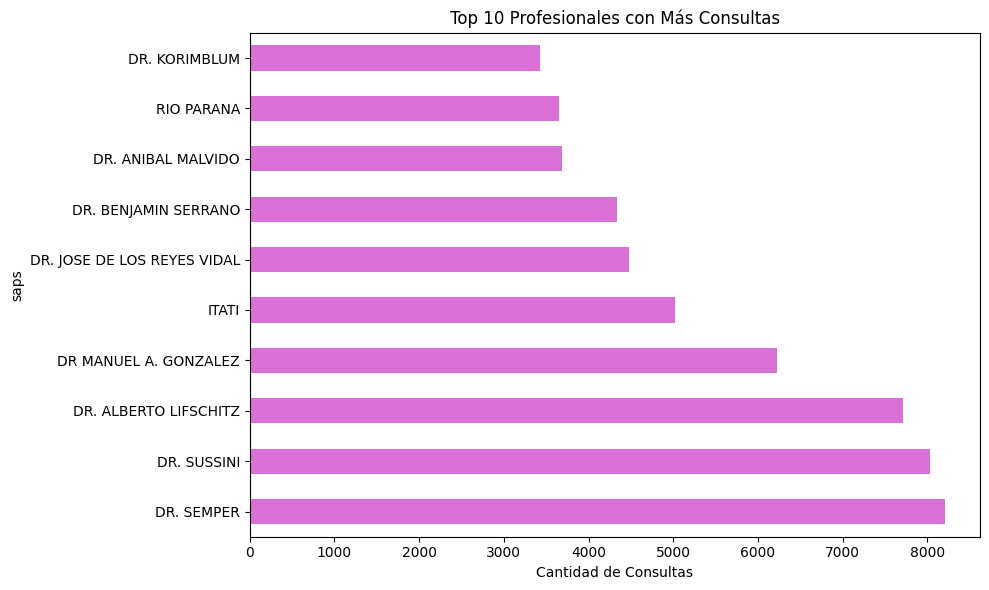

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo imputado
df = pd.read_csv("/content/consultas_odontologicas_imputado.csv")

# Agrupar datos para visualización
etario_counts = df.groupby('rango_etario')['consulta_cantidad'].sum()
sexo_counts = df.groupby('sexo')['consulta_cantidad'].sum()
detalle_counts = df.groupby('detalle')['consulta_cantidad'].sum().sort_values(ascending=False).head(10)
saps_counts = df.groupby('saps')['consulta_cantidad'].sum().sort_values(ascending=False).head(10)

# Crear gráficos
plt.figure(figsize=(10, 6))
etario_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución por Rango Etario')
plt.ylabel('Cantidad de Consultas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sexo_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribución por Sexo')
plt.ylabel('Cantidad de Consultas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
detalle_counts.plot(kind='barh', color='salmon')
plt.title('Top 10 Tipos de Consulta')
plt.xlabel('Cantidad de Consultas')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
saps_counts.plot(kind='barh', color='orchid')
plt.title('Top 10 Profesionales con Más Consultas')
plt.xlabel('Cantidad de Consultas')
plt.tight_layout()
plt.show()


Se detectaron inconsistencias con las fechas, por lo cual Identificaremos convertiremos y reemplazaremos, estas inconsistencias

In [7]:
# Convertir fechas y marcar errores
df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')

# Identificar registros con fechas inválidas
fechas_invalidas = df[df['fecha'].isnull()]

# Reemplazar fechas inválidas por la moda (fecha más frecuente)
fecha_moda = df['fecha'].mode()[0]
df.loc[df['fecha'].isnull(), 'fecha'] = fecha_moda

print(f"Fecha utilizada para corrección: {fecha_moda}")

Fecha utilizada para corrección: 2020-02-01 00:00:00


- Se detectaron 10 fechas inválidas.
- Todas fueron corregidas usando la fecha más frecuente: 2020-02-01.

**Creacion de reglas de coherencia y corrección de Incoherencias entre Edad y Tipo de Consulta.**

In [8]:
# Definir reglas de coherencia

cond_nino = df['rango_etario'].str.contains("1 - 4|5 - 14|< 1", case=False)
cond_adulto = df['rango_etario'].str.contains("15 - 19|20 - 39|40 - 69|>= 70", case=False)

incoherentes_nino = df[cond_nino & df['detalle'].str.contains("ADULTO", case=False)]
incoherentes_adulto = df[cond_adulto & df['detalle'].str.contains("NIÑOS|NINOS", case=False)]

total_incoherencias = len(incoherentes_nino) + len(incoherentes_adulto)
print(f"Incoherencias detectadas: {total_incoherencias}")

# Corrección
df.loc[cond_nino & df['detalle'].str.contains("ADULTO", case=False), 'detalle'] = \
    df['detalle'].str.replace("ADULTO", "PEDIATRICO", case=False)

df.loc[cond_adulto & df['detalle'].str.contains("NIÑOS|NINOS", case=False), 'detalle'] = \
    df['detalle'].str.replace("NIÑOS|NINOS", "ADULTO", case=False, regex=True)

# Confirmar correcciones
incoherencias_restantes = df[
    (cond_nino & df['detalle'].str.contains("ADULTO", case=False)) |
    (cond_adulto & df['detalle'].str.contains("NIÑOS|NINOS", case=False))
]
print(f"Incoherencias restantes después de corrección: {len(incoherencias_restantes)}")



Incoherencias detectadas: 0
Incoherencias restantes después de corrección: 0


Realizaremos una serie de validaciones necsarias, para que el sistema deteccte errores antes de ser diligencciada e insertados los pacientes:

1. Detección de duplicados
- Verificar si hay registros repetidos (mismo profesional, fecha, rango etario, detalle).


2. Validación de valores extremos o atípicos
- Por ejemplo, si hay consultas con cantidades muy altas o negativas.

3. Homogeneización de texto en la columna detalle
- Unificar mayúsculas/minúsculas, corregir errores ortográficos comunes.

4. Validación de turnos y servicios
- Asegurar que los valores en turno y servicio estén dentro de un conjunto permitido (ej. “MAÑANA”, “TARDE”).

5. Generación de indicadores por centro de atención (saps)
- Total de consultas, promedio por día, por profesional, etc.

6. Clasificación de tipos de consulta
- Agrupar los detalles en categorías como “Preventiva”, “Urgencia”, “Restaurativa”, etc.

In [9]:
df.columns.values[0] = 'saps'

# -----------------------------
# 1. DETECCIÓN DE DUPLICADOS
# -----------------------------
duplicados = df.duplicated()
num_duplicados = duplicados.sum()

# -----------------------------
# 2. VALORES EXTREMOS EN CONSULTA_CANTIDAD
# -----------------------------
valores_negativos = df[df['consulta_cantidad'] < 0]
valores_altos = df[df['consulta_cantidad'] > df['consulta_cantidad'].quantile(0.99)]

# -----------------------------
# 3. LIMPIEZA DE TEXTO EN 'detalle'
# -----------------------------
df['detalle'] = df['detalle'].str.upper().str.strip()

# -----------------------------
# 4. VALIDACIÓN DE TURNOS Y SERVICIOS
# -----------------------------
turnos_validos = ['MANANA', 'TARDE', 'MANANA/TARDE']
servicios_validos = ['ODONTOLOGIA']
turnos_invalidos = df[~df['turno'].str.upper().isin(turnos_validos)]
servicios_invalidos = df[~df['servicio'].str.upper().isin(servicios_validos)]

# -----------------------------
# 5. INDICADORES POR CENTRO DE ATENCIÓN (SAPS)
# -----------------------------
indicadores_saps = df.groupby('saps').agg(
    total_consultas=('consulta_cantidad', 'sum'),
    promedio_consultas=('consulta_cantidad', 'mean'),
    cantidad_registros=('consulta_cantidad', 'count')
).sort_values(by='total_consultas', ascending=False)

# -----------------------------
# 6. CLASIFICACIÓN DE TIPOS DE CONSULTA
# -----------------------------
def clasificar_consulta(texto):
    texto = texto.upper()
    if 'URGENCIA' in texto:
        return 'URGENCIA'
    elif 'FLUOR' in texto or 'PREVENCION' in texto or 'CONTROL' in texto:
        return 'PREVENTIVA'
    elif 'EXTRACCION' in texto or 'CARIES' in texto or 'FOTOCURADO' in texto:
        return 'RESTAURATIVA'
    elif 'DERIVACION' in texto:
        return 'DERIVACION'
    else:
        return 'OTROS'

# Aplicar clasificación
df['tipo_consulta'] = df['detalle'].apply(clasificar_consulta)
clasificacion_resumen = df['tipo_consulta'].value_counts()

# -----------------------------
# MOSTRAR RESULTADOS
# -----------------------------
print("Validaciones adicionales realizadas:\n")
print(f"1. Registros duplicados detectados: {num_duplicados}")
print(f"2. Registros con valores negativos en consulta_cantidad: {len(valores_negativos)}")
print(f"3. Registros con valores extremadamente altos (> percentil 99): {len(valores_altos)}")
print(f"4. Turnos inválidos detectados: {len(turnos_invalidos)}")
print(f"5. Servicios inválidos detectados: {len(servicios_invalidos)}")
print("\n6. Clasificación de tipos de consulta:")
print(clasificacion_resumen)
print("\n7. Indicadores por centro de atención (Top 5):")
print(indicadores_saps.head())


Validaciones adicionales realizadas:

1. Registros duplicados detectados: 347
2. Registros con valores negativos en consulta_cantidad: 0
3. Registros con valores extremadamente altos (> percentil 99): 222
4. Turnos inválidos detectados: 5
5. Servicios inválidos detectados: 0

6. Clasificación de tipos de consulta:
tipo_consulta
OTROS           8559
RESTAURATIVA    7489
URGENCIA        4836
PREVENTIVA      1811
DERIVACION       284
Name: count, dtype: int64

7. Indicadores por centro de atención (Top 5):
                       total_consultas  promedio_consultas  cantidad_registros
saps                                                                          
DR. SEMPER                 8211.000000            5.698126                1441
DR. SUSSINI                8028.000000            3.158143                2542
DR. ALBERTO LIFSCHITZ      7715.000000            5.284247                1460
DR MANUEL A. GONZALEZ      6225.793054            4.156070                1498
ITATI            

**Exportar archivos con resultados y correcciones aplicadas**

In [10]:

df.columns.values[0] = 'saps'

# Clasificación de tipo de consulta
def clasificar_consulta(texto):
    texto = str(texto).upper()
    if 'URGENCIA' in texto:
        return 'URGENCIA'
    elif 'FLUOR' in texto or 'PREVENCION' in texto or 'CONTROL' in texto:
        return 'PREVENTIVA'
    elif 'EXTRACCION' in texto or 'CARIES' in texto or 'FOTOCURADO' in texto:
        return 'RESTAURATIVA'
    elif 'DERIVACION' in texto:
        return 'DERIVACION'
    else:
        return 'OTROS'

# Aplicar clasificación
df['tipo_consulta'] = df['detalle'].apply(clasificar_consulta)

# Validaciones
duplicados = df[df.duplicated()]
valores_negativos = df[df['consulta_cantidad'] < 0]
valores_altos = df[df['consulta_cantidad'] > df['consulta_cantidad'].quantile(0.99)]
turnos_validos = ['MANANA', 'TARDE', 'MANANA/TARDE']
servicios_validos = ['ODONTOLOGIA']
turnos_invalidos = df[~df['turno'].str.upper().isin(turnos_validos)]
servicios_invalidos = df[~df['servicio'].str.upper().isin(servicios_validos)]
clasificacion_resumen = df['tipo_consulta'].value_counts()
indicadores_saps = df.groupby('saps').agg(
    total_consultas=('consulta_cantidad', 'sum'),
    promedio_consultas=('consulta_cantidad', 'mean'),
    cantidad_registros=('consulta_cantidad', 'count')
).sort_values(by='total_consultas', ascending=False)

# Crear archivo Excel con múltiples hojas
with pd.ExcelWriter("reporte_validaciones_clinica.xlsx", engine="openpyxl") as writer:
    df.to_excel(writer, sheet_name="Datos Corregidos", index=False)
    duplicados.to_excel(writer, sheet_name="Duplicados", index=False)
    valores_negativos.to_excel(writer, sheet_name="Valores Negativos", index=False)
    valores_altos.to_excel(writer, sheet_name="Valores Altos", index=False)
    turnos_invalidos.to_excel(writer, sheet_name="Turnos Invalidos", index=False)
    servicios_invalidos.to_excel(writer, sheet_name="Servicios Invalidos", index=False)
    clasificacion_resumen.to_frame(name="Cantidad").to_excel(writer, sheet_name="Tipo Consulta")
    indicadores_saps.to_excel(writer, sheet_name="Resumen por SAPS")

print("Archivo Excel 'reporte_validaciones_clinica.xlsx' generado con éxito.")


Archivo Excel 'reporte_validaciones_clinica.xlsx' generado con éxito.


Una vez que ya tenemos nuestro csv limmpio y con las validaciones que se creyeron considerables, pasaremos a exportar diferentes archivos .csv, para generar dashboard con powerBI.

In [11]:
df.columns.values[0] = 'saps'

# Clasificación de tipo de consulta
def clasificar_consulta(texto):
    texto = str(texto).upper()
    if 'URGENCIA' in texto:
        return 'URGENCIA'
    elif 'FLUOR' in texto or 'PREVENCION' in texto or 'CONTROL' in texto:
        return 'PREVENTIVA'
    elif 'EXTRACCION' in texto or 'CARIES' in texto or 'FOTOCURADO' in texto:
        return 'RESTAURATIVA'
    elif 'DERIVACION' in texto:
        return 'DERIVACION'
    else:
        return 'OTROS'

# Aplicar clasificación
df['tipo_consulta'] = df['detalle'].apply(clasificar_consulta)

# Datos para gráficos
tipo_consulta = df['tipo_consulta'].value_counts().reset_index()
tipo_consulta.columns = ['tipo_consulta', 'cantidad']

consultas_por_saps = df.groupby('saps')['consulta_cantidad'].sum().reset_index().sort_values(by='consulta_cantidad', ascending=False)
consultas_por_sexo = df.groupby('sexo')['consulta_cantidad'].sum().reset_index()
consultas_por_edad = df.groupby('rango_etario')['consulta_cantidad'].sum().reset_index().sort_values(by='consulta_cantidad', ascending=False)
valores_altos = df[df['consulta_cantidad'] > df['consulta_cantidad'].quantile(0.99)]

# Exportar CSVs para Power BI
tipo_consulta.to_csv("powerbi_tipo_consulta.csv", index=False)
consultas_por_saps.to_csv("powerbi_consultas_por_saps.csv", index=False)
consultas_por_sexo.to_csv("powerbi_consultas_por_sexo.csv", index=False)
consultas_por_edad.to_csv("powerbi_consultas_por_edad.csv", index=False)
valores_altos.to_csv("powerbi_valores_altos.csv", index=False)

print("Archivos CSV para Power BI generados:")
print("- powerbi_tipo_consulta.csv")
print("- powerbi_consultas_por_saps.csv")
print("- powerbi_consultas_por_sexo.csv")
print("- powerbi_consultas_por_edad.csv")
print("- powerbi_valores_altos.csv")


Archivos CSV para Power BI generados:
- powerbi_tipo_consulta.csv
- powerbi_consultas_por_saps.csv
- powerbi_consultas_por_sexo.csv
- powerbi_consultas_por_edad.csv
- powerbi_valores_altos.csv
